<a href="https://colab.research.google.com/github/Sxbxn/Data_Mining-Study/blob/main/HCA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [80]:
url = 'https://raw.githubusercontent.com/Sxbxn/Data_Mining-Study/eb7b81fbd5f098a8f2d83e71c485340026d3169b/data/Iris.csv'
df1 = pd.read_csv(url)
print (df1)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [81]:
data = df1.iloc[:, 1:3].values

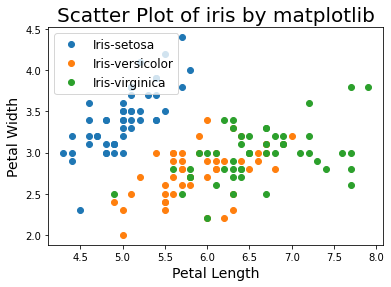

In [98]:
groups = df1.groupby('Species')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.SepalLengthCm, 
            group.SepalWidthCm, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='upper left') # legend position

plt.title('Scatter Plot of iris by matplotlib', fontsize=20)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.show()


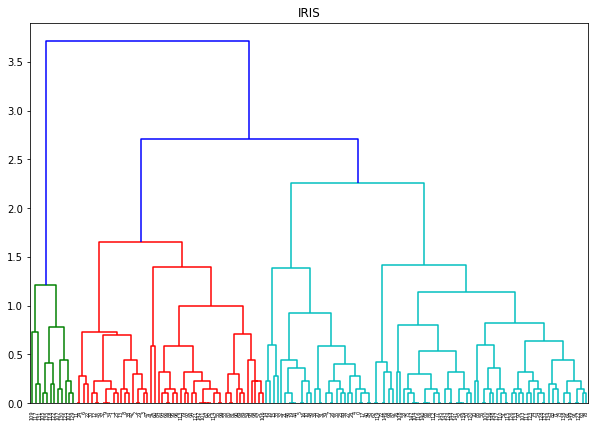

In [83]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("IRIS")
dend = shc.dendrogram(shc.linkage(data, method='complete'))

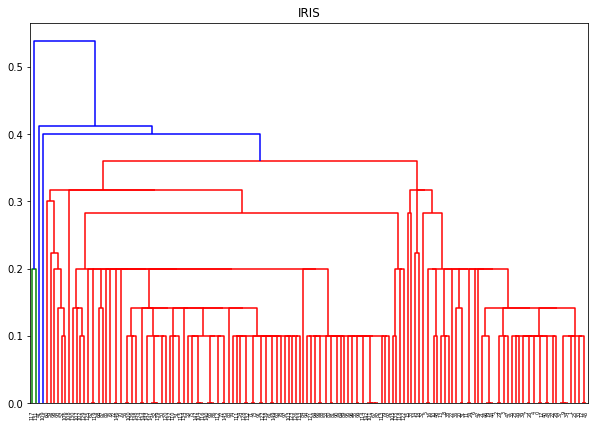

In [84]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("IRIS")
dend = shc.dendrogram(shc.linkage(data, method='single'))

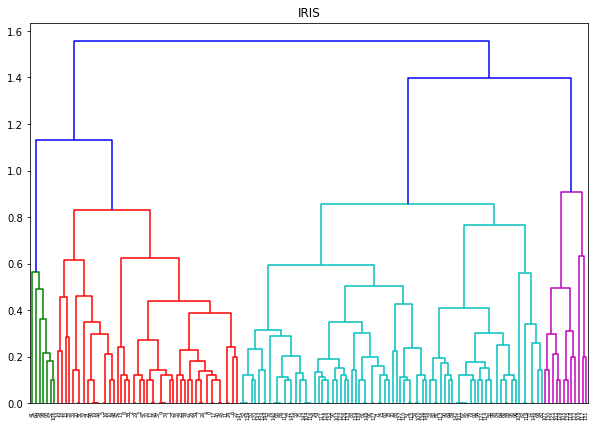

In [85]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("IRIS")
dend = shc.dendrogram(shc.linkage(data, method='average'))

In [89]:
from sklearn.cluster import AgglomerativeClustering

cluster_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster_1.fit_predict(data)

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

In [90]:
from sklearn.cluster import AgglomerativeClustering

cluster_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
cluster_1.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])